# LOGISTIC REGRESSION



Logistic regression is named for the function used at the core of the method, the logistic function. In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values. Logistic Regression is used when response variable is categorical in nature.

Since we are dealing with probabilities in this kind of regression, the output can't be greater than 1 or less than 0.

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

Where,
    $p$ is the probability

We first put

$$p = e^{y} = e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n} $$

This solves our problem of the probability being negative.

To make it always less than one, we perform the following operation:

$$p = \frac{e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n}}{e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n} + 1}$$

The logistic function, also called the sigmoid function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

The odds ratio is:

$$OR = \frac{p}{1-p} = e^{\beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n} $$

Taking logs we get the log-odds function

$$\log{OR} = \log{\frac{p}{1-p}} = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n $$

This is the linear representation of the sigmoid function


**Pros**: Robust, can handle non-linear effects, explicit interaction and power terms can be added

**Cons**: Limited Outcome Variables, Independent observations required

In [192]:
import pandas as pd #to create our dataframes
import matplotlib.pyplot as plt #for plotting the probability histograms and output distribution
import numpy as np #to create numpy arrays
from sklearn.model_selection import train_test_split #to divide our data sets into testing and training subsections
from sklearn.preprocessing import StandardScaler #to standardize our data
from sklearn.linear_model import LogisticRegression, LinearRegression #the module to carry out the logistic regression function
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score #metrics we will use to score our classifier
from matplotlib.colors import ListedColormap #for colors in the plots


path = 'Table_76.csv'

## Column explanations
   1. 'pregnant' - Number of times pregnant
   2. 'glucose' - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. 'bp' - Diastolic blood pressure (mm Hg)
   4. 'skin' - Triceps skin fold thickness (mm)
   5. 'insulin' - 2-Hour serum insulin (mu U/ml)
   6. 'bmi' - Body mass index (weight in kg/(height in m)^2)
   7. 'pedigree' - Diabetes pedigree function
   8. 'age' - Age (years)
   9. 'diabetic' - Whether diabetic or not (0 or 1)

In [193]:
col_names = ['state', 'population', 'increase', 'area', 'density', 'sex-ratio','literacy'] #have to assign a column name
                                                                                                #since dataset has no headers
df = pd.read_csv(path, header = None, names = col_names)
df.head()
# print(df.head())
# df.corr()
# df2 = pd.read_csv('C:\\Users\\ACER\\Desktop\\hacathon\\litracy.csv')
# display(df.head())
# display(df2.head())
# print(df.shape)
# print(df2.shape)

,state,population,increase,area,density,sex-ratio,literacy
0,India,"1,210,854,977",17.64%,"3,287,240",382,940,74.04
1,Uttar Pradesh,"199,812,341",20.23%,"240,928",829,912,67.68
2,Maharashtra,"112,374,333",15.99%,"307,713",365,929,82.34
3,Bihar,"104,099,452",25.42%,"94,163","1,106",918,61.80
4,West Bengal,"91,276,115",13.84%,"88,752","1,028",950,76.26


In [198]:
X = df.iloc[:, [4,5]].values #first for our classifier we are chosing bmi and age as features
print(type(X))

y = df.iloc[:, 6].values #obviously the diabetic column is the labelX


# display(X)
# display(y)
final = []

for item in X:
    for items in item:
        if type(items) == str:
            items = items.replace(",", "")
        items = int(items)
        final.append(items)
final = np.array(final)
X = final.reshape(-1, 2)
display(X)

#     print(type(item))

<class 'numpy.ndarray'>


array([[  382,   940],
       [  829,   912],
       [  365,   929],
       [ 1106,   918],
       [ 1028,   950],
       [  308,   993],
       [  236,   931],
       [  555,   996],
       [  200,   928],
       [  319,   973],
       [  308,   919],
       [  270,   979],
       [  860,  1084],
       [  414,   948],
       [  398,   958],
       [  551,   895],
       [  189,   991],
       [  573,   879],
       [11320,   868],
       [   56,   889],
       [  189,   963],
       [  123,   972],
       [  350,   960],
       [  132,   989],
       [  128,   985],
       [  119,   931],
       [  394,   973],
       [   17,   938],
       [ 2547,  1037],
       [   52,   976],
       [ 9258,   818],
       [   86,   890],
       [   46,   876],
       [  700,   774],
       [ 2191,   618],
       [ 2149,   946]])

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #we are assigning 30% of our data for testing



In [200]:
X_train

array([[ 700,  774],
       [ 236,  931],
       [ 270,  979],
       [ 200,  928],
       [ 551,  895],
       [ 829,  912],
       [ 365,  929],
       [ 860, 1084],
       [ 398,  958],
       [  52,  976],
       [2191,  618],
       [  56,  889],
       [ 555,  996],
       [ 319,  973],
       [2149,  946],
       [ 350,  960],
       [ 308,  919],
       [ 189,  963],
       [1028,  950],
       [2547, 1037],
       [ 382,  940],
       [  17,  938],
       [9258,  818],
       [  46,  876],
       [  86,  890],
       [ 414,  948],
       [ 128,  985],
       [ 308,  993]])

In [201]:
sc = StandardScaler() #we need to scale our data so normalization or standardization is introduced

sc.fit_transform(X_train)
sc.transform(X_test)

print("")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [212]:
logreg = LinearRegression() #here we apply the regression

logreg.fit(X_train, y_train)
print(type(X_train))
print(type(y_train))

ValueError: Unknown label type: 'continuous'

In [203]:
print(logreg.intercept_)
print(logreg.coef_)


68.0804440132
[ 0.00175292  0.00883827]


In [211]:
y_pred = logreg.predict(X_test)


print(y_pred)
y_test
final = 0

for counter, item in enumerate(y_pred):
    result = item - y_test[counter]
    print(item, y_test[counter], result)
#     final += result
print(final)
# print(accuracy_score(y_test, y_pred)) #prediction based on what we thought would be the most important factor

[ 77.05287935  78.13270347  76.51747169  76.85370601  95.59508649
  77.37073132  76.88685248  77.17047217]
77.0528793467 74.43 2.62287934674
78.1327034702 61.8 16.3327034702
76.5174716907 79.55 -3.03252830933
76.8537060083 75.55 1.30370600832
95.5950864924 86.21 9.3850864924
77.370731321 88.7 -11.329268679
76.8868524805 82.8 -5.91314751946
77.1704721713 70.28 6.89047217132
0


## NULL Accuracy

For this method we take the class that is most frequent in our data set and see if that is predicted everywhere what would the accuracy be. This becomes our baseline to which we compare our regression accuracy.

In [167]:
y.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [10]:
y.mean()

0.3489583333333333

In [11]:
1 - y.mean() #NULL accuracy

0.6510416666666667

So we saw that, on basing our classifier on the 'bmi' and 'age' criterion, the accuracy of 69% is not that much better than our NULL accuracy of 65%. Thus we need to change our features.

In [12]:
X = df.iloc[:, :-1] #we take all of the columns (except the label) as our features
y = df.iloc[:, 8]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

sc = StandardScaler()

sc.fit_transform(X_train)
sc.transform(X_test)

print("")

In [14]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print(logreg.intercept_)
print(logreg.coef_)


[-5.5163269]
[[  8.47322753e-02   2.68152493e-02  -1.81430489e-02  -8.25727466e-03
    1.18136847e-04   5.41994104e-02   7.39936116e-01   1.67474676e-02]]


In [15]:
y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred)) #accuracy increases

0.770562770563


In [16]:
features_col = ['glucose', 'pedigree'] #by some trial and error, we change our features to just these two.

X = df[features_col]

y = df['diabetic']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

sc = StandardScaler()

sc.fit_transform(X_train)
sc.transform(X_test)

print("")

In [18]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print(logreg.intercept_)
print(logreg.coef_)
y_pred = logreg.predict(X_test)

print(accuracy_score(y_test, y_pred)) #accuracy doesn't change much therefore the most important features

[-4.33046948]
[[ 0.02707095  0.9300736 ]]
0.779220779221


## The equation now


$$\log{\frac{p}{1-p}} = -4.48 + 0.02 \times Glucose + 0.45 \times Pedigree$$

[[137  35]
 [ 16  43]]


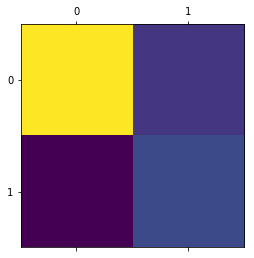

In [19]:
cm = confusion_matrix #this creates a confusion matrix for our data

conmat = cm(y_pred, y_test)
print(conmat)

plt.matshow(conmat)     #0-0 True positive    0-1 False positive
                        #1-0 False negative   1-1 True negative
plt.show()

In [20]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1] #this predicts the probability and slices to include only the columns with 1


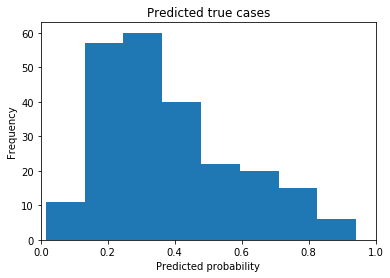

In [21]:
plt.hist(y_pred_prob, bins = 8) #because of the threshhold being 0.5, very few cases for class 1 above that probability
plt.xlim(0, 1)
plt.title("Predicted true cases")
plt.xlabel('Predicted probability')
plt.ylabel('Frequency')
plt.show()

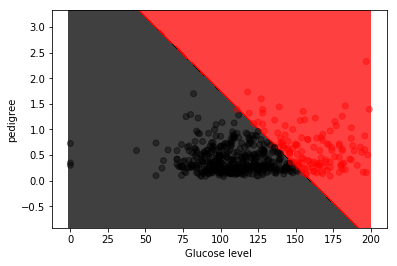

In [22]:
X_set, y_set = X_train, y_train   #our training output

plt.figure()
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'red')))


plt.scatter(X_set.iloc[:,0], X_set.iloc[:,1], c = logreg.predict_proba(X_set)[:,1], cmap = ListedColormap(('black', 'red')),
            alpha = 0.4)
plt.xlabel('Glucose level ')
plt.ylabel('pedigree')
plt.show()

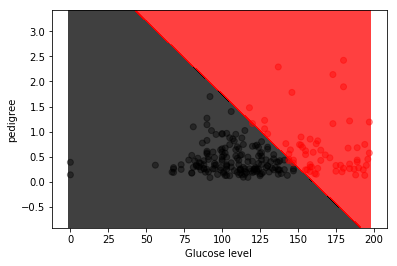

In [23]:
X_set, y_set = X_test, y_test  #our testing output
plt.figure()
X1, X2 = np.meshgrid(np.arange(start = X_set.iloc[:, 0].min() - 1, stop = X_set.iloc[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set.iloc[:, 1].min() - 1, stop = X_set.iloc[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logreg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('black', 'red')))


plt.scatter(X_set.iloc[:,0], X_set.iloc[:,1], c = logreg.predict_proba(X_set)[:,1], cmap = ListedColormap(('black', 'red')),
            alpha = 0.4)
plt.xlabel('Glucose level ')
plt.ylabel('pedigree')
plt.show()